In [38]:
import urllib.request
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#importing libraries

In [39]:
url = "ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt"
f = '../../data_external/Rise_of_co2.txt'
#adding file

In [40]:
if not os.path.isdir('../../data_external/'):
  os.mkdir('../../data_external/')
r = urllib.request.urlopen(url)
fo = open(f, 'wb')
shutil.copyfileobj(r, fo)
fo.close()
#defining file path and opening

In [41]:
lines = open(f, 'r').readlines() #line reading

In [42]:
data = np.genfromtxt(f, skip_header=72, usecols=(0,1,2,3), dtype=None, names=("year", "month", "date","average")) #removing unnecessary lines and data

In [43]:
data['average'] = np.ma.masked_invalid(data['average'])


# Define column names for necessary data
columns = ['year', 'month', 'date', 'average']

# make  a pandas DataFrame from the masked data
df = pd.DataFrame(data)


# Show DataFrame
df

,year,month,date,average
0,1960,9,1960.7077,314.17
1,1960,10,1960.7896,313.83
2,1960,11,1960.8743,315.00
3,1960,12,1960.9563,316.19
4,1961,1,1961.0411,316.89
...,...,...,...,...
752,2023,5,2023.3750,424.00
753,2023,6,2023.4583,423.68
754,2023,7,2023.5417,421.83
755,2023,8,2023.6250,419.68


In [44]:
# Define the quadratic function to fit
def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

In [45]:
from scipy.optimize import curve_fit

In [46]:
# Perform the quadratic curve fit
x = np.arange(len(df))
y = df['average']
cfod, _ =curve_fit(quadratic_func, x, y)

# Extract the coefficients of the quadratic fit
a, b, c = cfod


In [47]:
# Calculate the rate of change (derivative)
roc = 2 * a * x[-1] + b

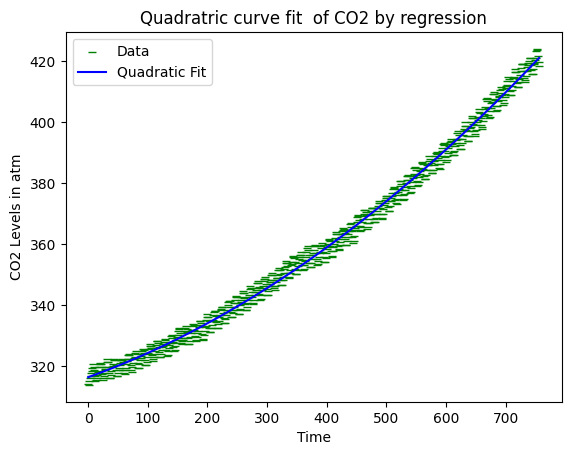

In [48]:

plt.figure()
plt.scatter(x, y, label='Data', color='g',linewidth=1,marker='_')
plt.plot(x, quadratic_func(x, a, b, c), 'b', label='Quadratic Fit')
plt.title("Quadratric curve fit  of CO2 by regression")
plt.xlabel("Time")
plt.ylabel("CO2 Levels in atm")
plt.legend()
plt.show()

In [49]:
roc

0.20657556904139085

as rate of change >0; the rate of increase of c02 is increasing